In [2]:
import numpy as np

filted_increase_mat_one = np.genfromtxt(
    "./preprocessed_data/increase_mat_one.csv", 
    delimiter=','
)
filted_increase_mat_two = np.genfromtxt(
    "./preprocessed_data/increase_mat_two.csv", 
    delimiter=','
)
filted_steady_mat = np.genfromtxt(
    "./preprocessed_data/steady_mat.csv", 
    delimiter=','
)

In [21]:
import numpy as np
from sklearn.decomposition import FastICA

def apply_ica(data, num_components):
    # Initialize ICA
    # ica = FastICA(n_components=num_components, random_state=0, max_iter=10000)
    ica = FastICA(n_components=num_components, max_iter=10000)
    # Fit and transform the data to the ICA model
    S_ = ica.fit_transform(data)  # Reconstruct signals
    A_ = ica.mixing_  # Get estimated mixing matrix
    
    return S_, A_

# Assuming the number of electrodes gives an upper limit on components
num_components = 4
 
# Apply ICA to each dataset
S_increase_one, A_increase_one = apply_ica(filted_increase_mat_one, num_components)
S_increase_two, A_increase_two = apply_ica(filted_increase_mat_two, num_components)
S_steady, A_steady = apply_ica(filted_steady_mat, num_components)


In [9]:
A_steady.shape

(73214, 4)

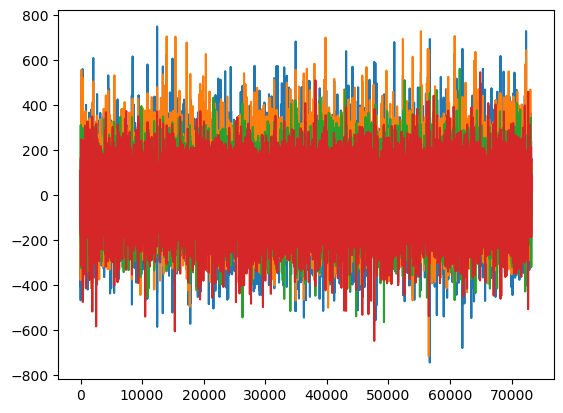

In [10]:
import matplotlib.pyplot as plt
plt.plot(A_steady)
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


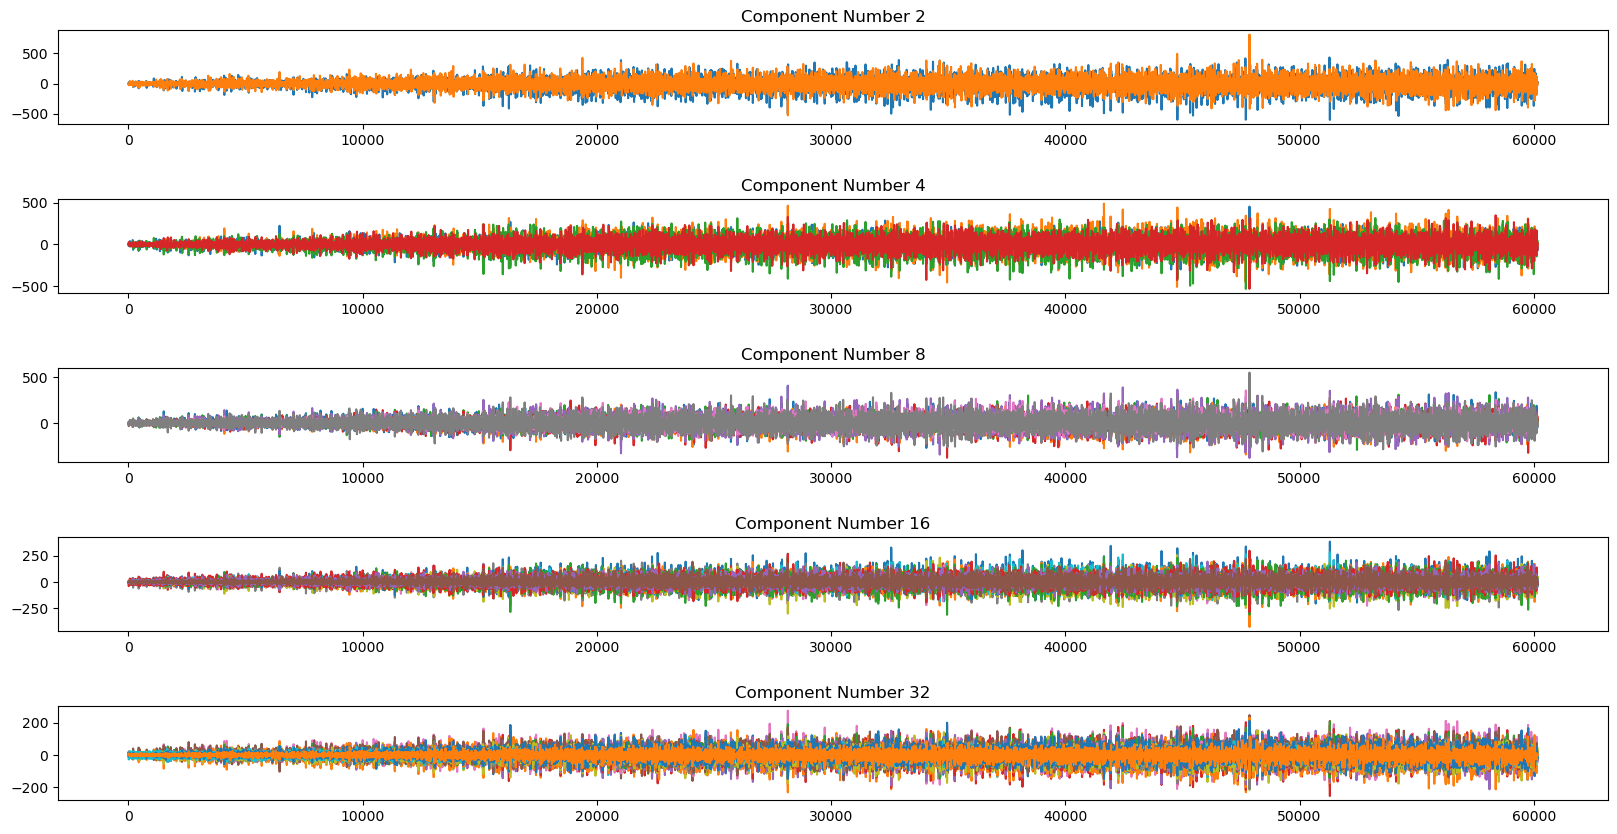

In [22]:
n_comps = [2, 4, 8, 16, 32] 

H_list_steady_ica = []
H_list_incr_1_ica = []
H_list_incr_2_ica = []

for each_n in n_comps:
    
    S1, A1 = apply_ica(filted_increase_mat_one, each_n)
    S2, A2 = apply_ica(filted_increase_mat_two, each_n)
    S3, A3  = apply_ica(filted_steady_mat, each_n)
    
    H_list_steady_ica.append(A1)
    H_list_incr_1_ica.append(A2)
    H_list_incr_2_ica.append(A3)
    


plt.figure(figsize=(20, 10))

for i in range(len(H_list_steady_ica)):
    
    ax = plt.subplot(len(H_list_steady_ica), 1, i + 1)
    plt.plot(H_list_steady_ica[i])
    ax.set_title(f"Component Number {n_comps[i]}")
    
    np.savetxt('./decomposed_data/' + 'steady_mat_ica_compo_{}.csv'.format(n_comps[i]), H_list_steady_ica[i], delimiter=',')

plt.subplots_adjust(wspace=0.4, hspace=0.8) 
plt.show()


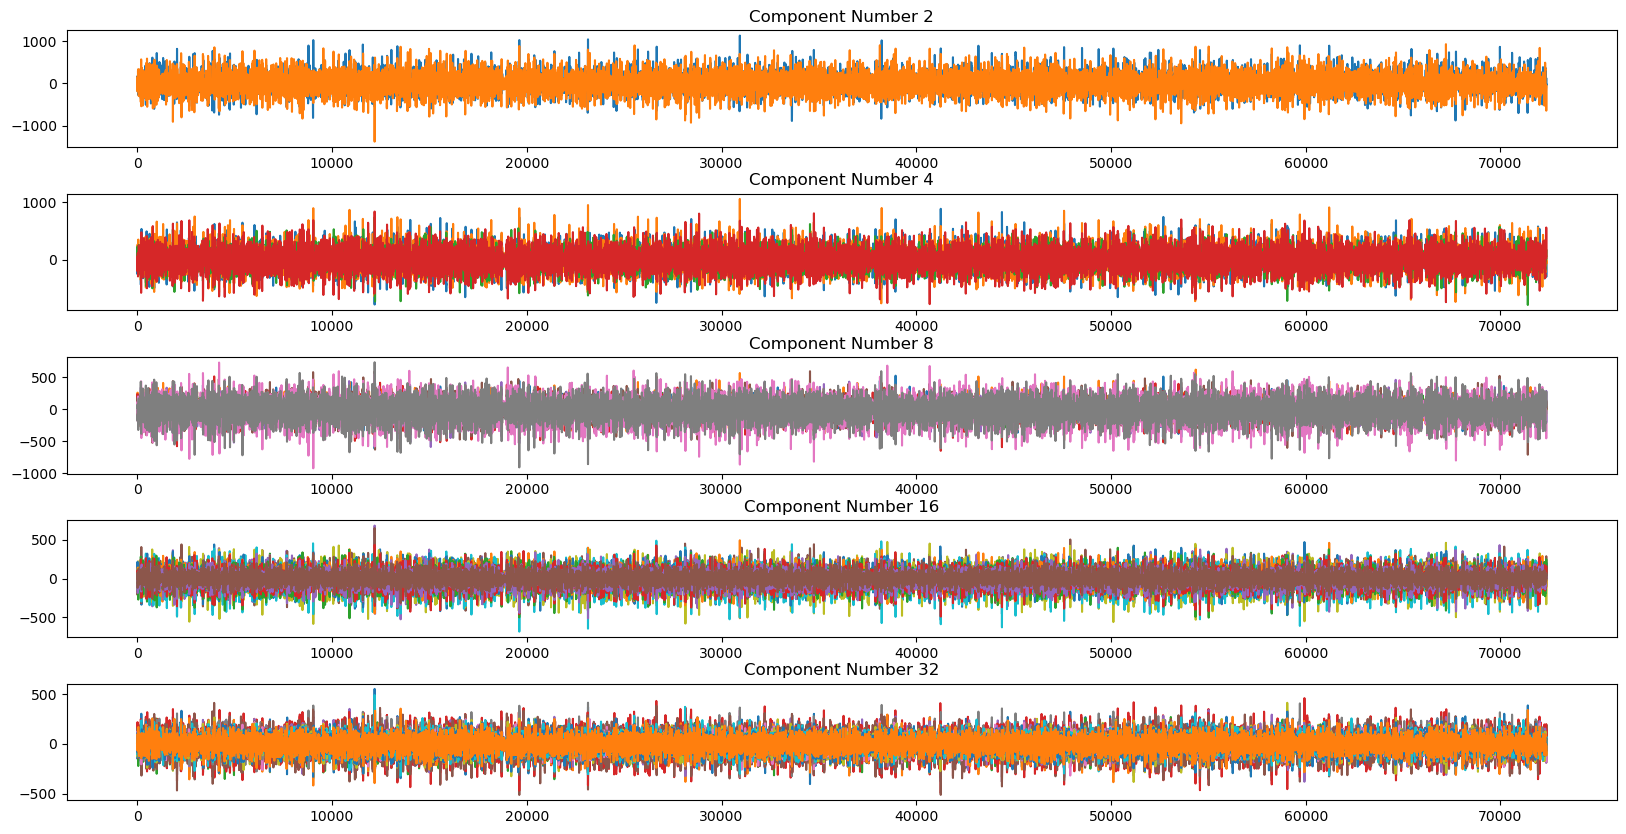

In [24]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_1_ica)):
    
    ax = plt.subplot(len(H_list_incr_1_ica), 1, i + 1)
    plt.plot(H_list_incr_1_ica[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt("./decomposed_data/" + 'increase_mat_one_ica_compo_{}.csv'.format(n_comps[i]), H_list_incr_1_ica[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()

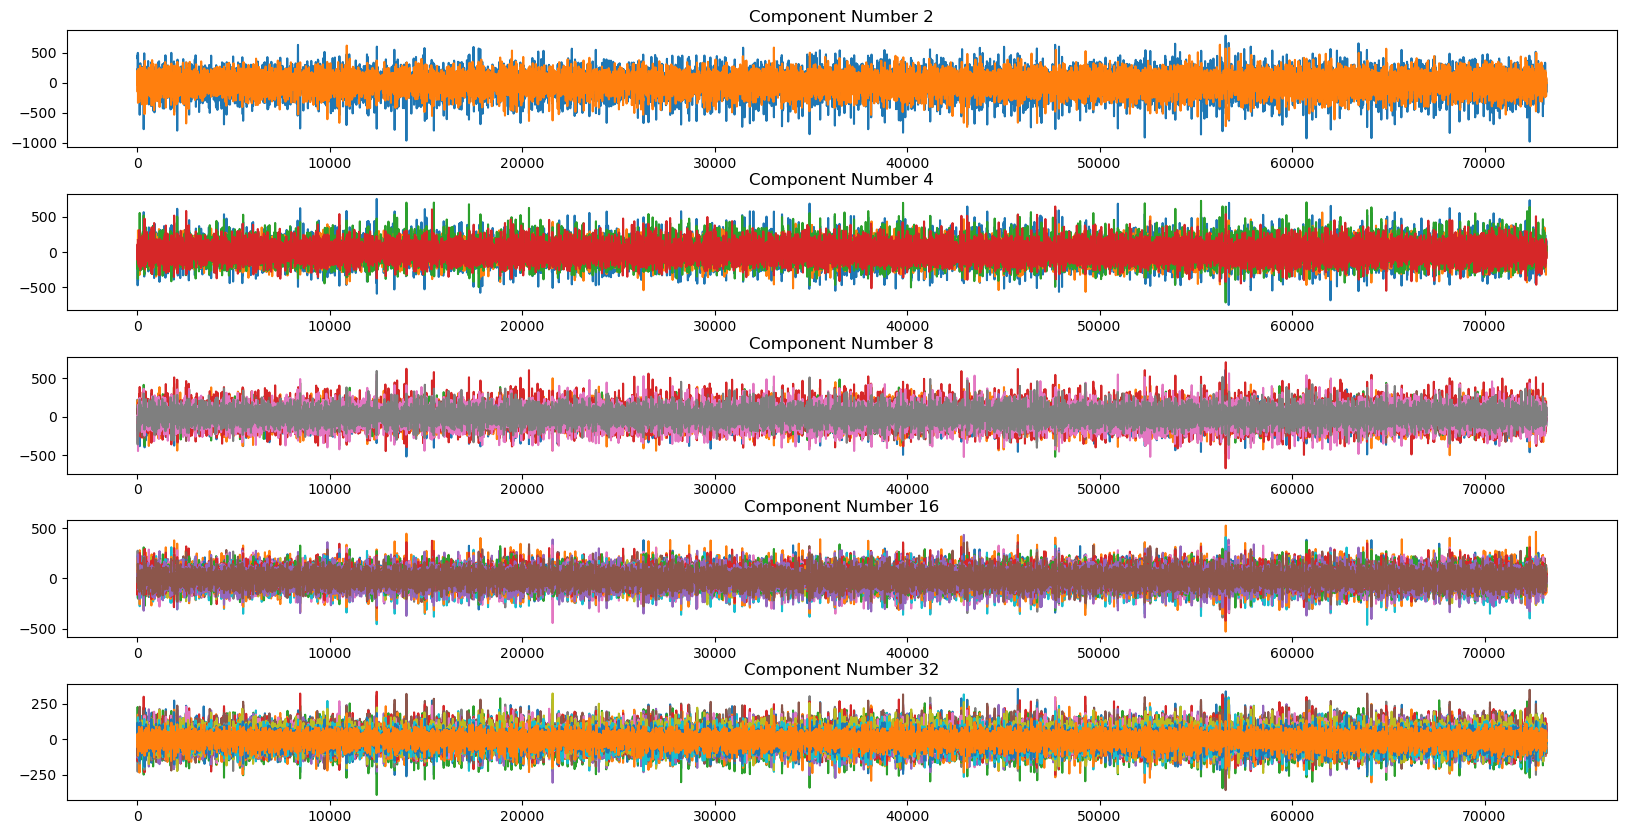

In [26]:
plt.figure(figsize=(20, 10))

for i in range(len(H_list_incr_2_ica)):
    
    ax = plt.subplot(len(H_list_incr_2_ica), 1, i + 1)
    plt.plot(H_list_incr_2_ica[i])
    
    ax.set_title(f"Component Number {n_comps[i]}")

    np.savetxt("./decomposed_data/" + 'increase_mat_two_ica_compo_{}.csv'.format(n_comps[i]), H_list_incr_2_ica[i], delimiter=',')
    
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()